## Tools and resources

- An open-source [graph database](https://neo4j.com/developer/get-started/?ref=footer)

- An open-source [data souce](https://permid.org/)


In [1]:
from OpenPermID import OpenPermID
from neo4j import GraphDatabase
import rdflib

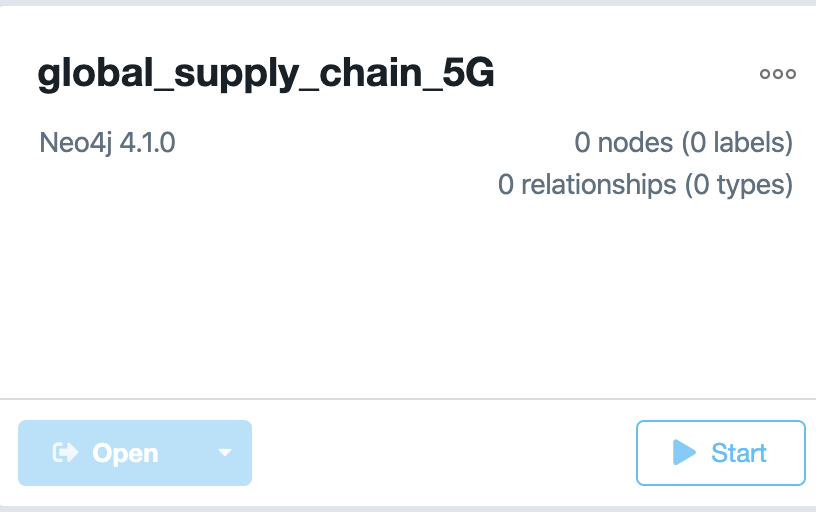

In [2]:
"""
Before uploading this notebook to GitHub, replace API Key string 
with "<API Key>".
"""
opid = OpenPermID()
opid.set_access_token("zS54mFFZvrTd8Eu8gyxwkGVfaTQQfp0M")

In [3]:
# API call to obtain www.permID.org data on companies in 5G supply chain
output,err = opid.matchFile("./data/Global_Supply_Chain_Players_5G.csv")

In [4]:
output.head()

,ProcessingStatus,Match OpenPermID,Match OrgName,Match Score,Match Level,Match Ordinal,Original Row Number,Input_LocalID,Input_Name
0,OK,https://permid.org/1-4295905573,Apple Inc,92%,Excellent,1,2,1,Apple
1,OK,https://permid.org/1-4295906830,Intel Corp,92%,Excellent,1,3,2,Intel
2,OK,https://permid.org/1-4295907706,Qualcomm Inc,92%,Excellent,1,4,3,Qualcomm
3,OK,https://permid.org/1-4295882451,Samsung Electronics Co Ltd,92%,Excellent,1,5,4,Samsung
4,OK,https://permid.org/1-4296309931,Huawei Technologies Co Ltd,62%,Good,1,6,5,Huawei


In [5]:
# drop rows with Null values (corporate entities without 
# record on www.permID.org.) 
output = output[output['Input_LocalID'].notna()]

In [6]:
# Select relevant fields from return from the API call.
players_df = output[['Input_Name', 
                     'Match OpenPermID', 
                     'Match OrgName', 
                     'Match Score', 
                     'Match Level']]

In [7]:
# Eliminate low "Match Score" players
high_score_companies = (players_df['Match Score']
                        .apply(lambda x: int(x[:-1])) > 50)
players_5G_df = players_df[high_score_companies]
players_5G_df

,Input_Name,Match OpenPermID,Match OrgName,Match Score,Match Level
0,Apple,https://permid.org/1-4295905573,Apple Inc,92%,Excellent
1,Intel,https://permid.org/1-4295906830,Intel Corp,92%,Excellent
2,Qualcomm,https://permid.org/1-4295907706,Qualcomm Inc,92%,Excellent
3,Samsung,https://permid.org/1-4295882451,Samsung Electronics Co Ltd,92%,Excellent
4,Huawei,https://permid.org/1-4296309931,Huawei Technologies Co Ltd,62%,Good
5,Wistron,https://permid.org/1-4295892600,Wistron Corp,92%,Excellent
6,Foxconn,https://permid.org/1-5000069307,Foxconn Technology Co Ltd,92%,Excellent
7,Pegatron,https://permid.org/1-5000431932,Pegatron Corp,92%,Excellent
8,Goertek,https://permid.org/1-4298008764,Goertek Inc,92%,Excellent
11,TSMC,https://permid.org/1-4295891425,Taiwan Semiconductor Manufacturing Co Ltd,92%,Excellent


### For demo purposes, here I use the permid.org API to read a news item in text string format.

In production, the Python driver can upload a query to www.permid.org in the form of "PDF, XML or RDF files, OR even a folder."

https://permid.org/onecalaisViewer

In [8]:
raw_text = """
Apple gets into 5G race; acquires Intel phone
modem business for $1 billion
Apple will hold over 17,000 wireless technology patents, ranging from protocols for cellular standards to
modem architecture and modem operation
IANS | San Francisco July 26, 2019 Last Updated at 09:58 IST
American technology company Apple has announced the acquisition of
chip-maker Intel's smartphone modem business for $1 billion.
Approximately 2,200 Intel employees will join Apple, along with intellectual property, equipment and leases,
the Cupertino-based iPhone maker said in a statement late Thursday.
The transaction is expected to close in the fourth quarter of 2019.
"This agreement enables us to focus on developing technology for the 5G network while retaining critical
intellectual property and modem technology that our team has created," said Intel CEO Bob Swan.
"We're looking forward to putting our full effort into 5G where it most closely aligns with the needs of our
global customer base, including network operators, telecommunications equipment manufacturers and cloud
service providers," he added.
7/13/2020 https://www.business-standard.com/article/printer-friendly-version?article_id=119072600214_1
https://www.business-standard.com/article/printer-friendly-version?article_id=119072600214_1 2/2
Apple will hold over 17,000 wireless technology patents, ranging from protocols for cellular standards to
modem architecture and modem operation.
Intel will retain the ability to develop modems for non-smartphone applications, such as PCs, internet-of-things
devices and autonomous vehicles.
Johny Srouji, Apple's senior vice president of Hardware Technologies said that Apple is excited to have
excellent engineers join its growing cellular technologies group.
"They, together with our significant acquisition of innovative IP, will help expedite our development on future
products and allow Apple to further differentiate moving forward," he added.
Apple has been working on its own chips for quite some time. Acquiring Intel's technology could help the
iPhone maker accelerate its plans.
Apple may have paid chip-maker Qualcomm somewhere between $5 billion-$6 billion for an agreement to
dismiss all ongoing litigations, including those with Apple's contract manufacturers.
Intel had been working on a chipset for the iPhone maker, with the chip expected to be part of iPhones by 2020.
"""

In [9]:
# Store the return of the permID.org API call, which includes 
# "intelligent tags" of corporate entities and their relationships.
output,err = opid.calais(raw_text, outputFormat='rdf')

### Brief intro of the RDF files, mentioning the Python eco-system has taken note of RDF, as evidences as a package dealing with RDF:

https://rdflib.readthedocs.io/en/stable/index.html

In [10]:
# analyze the return of the API call with the Python rdflib library
g = rdflib.Graph()

# which includes parsing the Resource Description Format (RDF) triples.parse a RDF file 
result = g.parse(output)

# loop through each triple in the graph (subj, pred, obj)
for subj, pred, obj in g:
    # check if there is at least one triple in the Graph
    if (subj, pred, obj) not in g:
       raise Exception("It better be!")

# print the number of "triples" in the Graph
print("graph has {} statements.".format(len(g)))
# prints graph has 86 statements.

# print out the entire Graph in the RDF Turtle format
print(g.serialize(format="turtle").decode("utf-8"))

file:///Users/borisli/Documents/TDI/TDI_07_2020_application/presentation_prep/<?xml version="1.0" encoding="UTF-8"?>
<!--Use of the Calais Web Service is governed by the Terms of Service located at http://www.opencalais.com. By using this service or the results of the service you agree to these terms of service.--><!--Relations: Acquisition, BusinessRelation, CompanyCompetitor, CompanyEmployeesNumber, CompanyLocation, CompanyTechnology, PersonCareer, Quotation, 
City: Cupertino
Company: Apple, Hardware Technologies, Intel, Qualcomm
IndustryTerm: 5G network, cellular technologies, contract manufacturers, internet-of-things devices, modem technology, non-smartphone applications, technology, telecommunications equipment manufacturers, wireless technology patents
Person: Bob Swan, Johny Srouji
Position: CEO, senior vice president of Hardware Technologies
Product: iPhone
Technology: modem technology, smartphone
--><rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:c="htt

FileNotFoundError: [Errno 2] No such file or directory: '/Users/borisli/Documents/TDI/TDI_07_2020_application/presentation_prep/<?xml version="1.0" encoding="UTF-8"?>\n<!--Use of the Calais Web Service is governed by the Terms of Service located at http://www.opencalais.com. By using this service or the results of the service you agree to these terms of service.--><!--Relations: Acquisition, BusinessRelation, CompanyCompetitor, CompanyEmployeesNumber, CompanyLocation, CompanyTechnology, PersonCareer, Quotation, \nCity: Cupertino\nCompany: Apple, Hardware Technologies, Intel, Qualcomm\nIndustryTerm: 5G network, cellular technologies, contract manufacturers, internet-of-things devices, modem technology, non-smartphone applications, technology, telecommunications equipment manufacturers, wireless technology patents\nPerson: Bob Swan, Johny Srouji\nPosition: CEO, senior vice president of Hardware Technologies\nProduct: iPhone\nTechnology: modem technology, smartphone\n--><rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns'

- Next, read the RDF files into a neo4j instance to develop a knowledge graph ("property graph" in Neo4j parlance).

- See a separate notebook with a script written in Neo4j's Cypher language (a SQL-like graph database query language).  

https://neo4j.com/docs/api/python-driver/current/api.html